# **IMPORTATION OF LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Read data from csv**


In [ ]:
df = pd.read_csv("/content/Dataset (2).csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# **DATA  EXPLORATION**
- Shape
- Data Types
- Check for missing values
- Outliers as well

## Data dimensions

In [ ]:
df.shape

(319795, 18)

## Feature Types

In [ ]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

## Summary of data set

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Check for missing values per feature

In [ ]:
# sum
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# Percentage
(df.isna().sum()/ len(df)) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

# **CLEANING**

In [ ]:
# get unique values per column in categorical values and replace with unique categories
age_classes = df['AgeCategory'].unique()
print(age_classes)

# assign each class a category :
class_replacements = {'55-59':'A', '80 or older':'B', '65-69':'C', '75-79':'D', '40-44':'E', '70-74':'F', '60-64':'G', '50-54':'H',
 '45-49':'I', '18-24':'J', '35-39':'K', '30-34':'L', '25-29':'M'}

df['AgeCategory'] = df['AgeCategory'].replace(class_replacements)
df.isna().sum()

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

**NOTE**: We will remove the missing values by removing the specific record having the missing values as the percentage of missing values is not high

# **CHECKING FOR OUTLIERS**

* Using BoxPlots (Cheking for points beyond the 'whiskers' - regarded as outliers)
* Targeting features with numerical values - BMI, PhysicalHealth, MentalHealth & Sleeptime  

Box Plot Interpretaion Guide:

![Box Plot](https://www.simplypsychology.org/wp-content/uploads/box-whisker-plot.jpg)




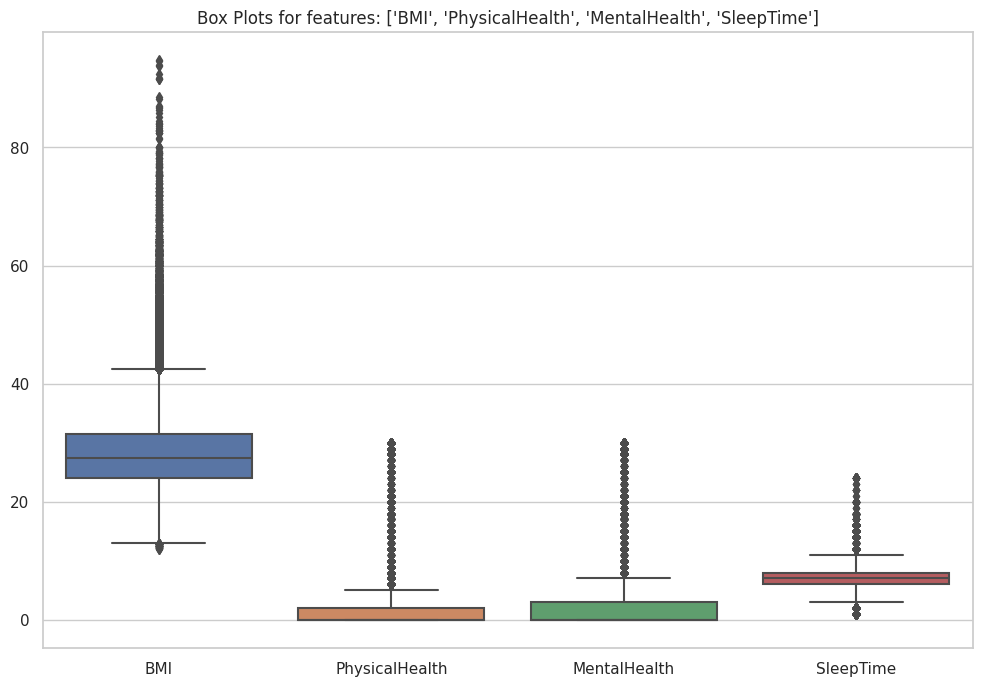

In [ ]:
target_features=  ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
# style of seaborn
sns.set(style="whitegrid")

# box plot for target features/ columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[target_features])
plt.title(f"Box Plots for features: {target_features}")
plt.show()

**Findings**:
- There exist outliers in the aformentioned features

## **CHECKING FOR CORRELATION**

- 0 to 0.2: Weak correlation
- 0.2 to 0.5: Moderate correlation
- 0.5 to 1: Strong correlation

<ipython-input-92-0228582a80a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000


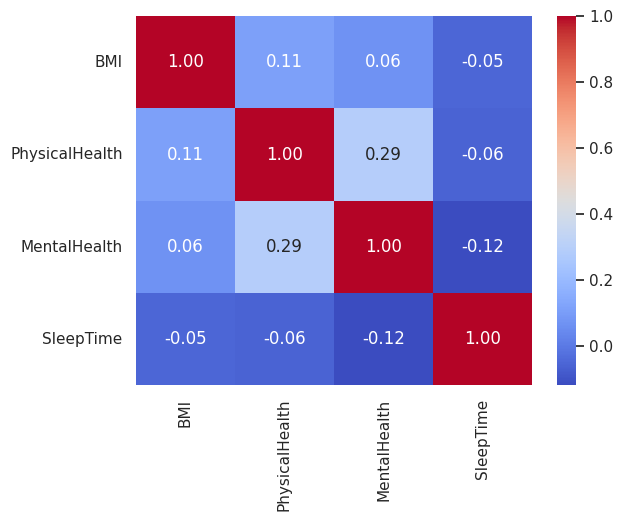

In [ ]:
correlation_matrix = df.corr()

# correlation matrix
print(correlation_matrix)

# heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

**Major finding:**
- There exists a positive correlation, indicating a moderate positive relationship between PhysicalHealth and MentalHealth. Higher levels of PhysicalHealth are associated with higher levels of MentalHealth.

# VISUALIZATIONS TO FOSTER:
- To understand patterns
- Storytelling

Note: We have both Categorical and Numerical Data, hence it would be best to use piecharts for categorical data since the categories are less than 8 hence better visual presentation and Histograms for the numerical data - easy visualization of the distribution of data

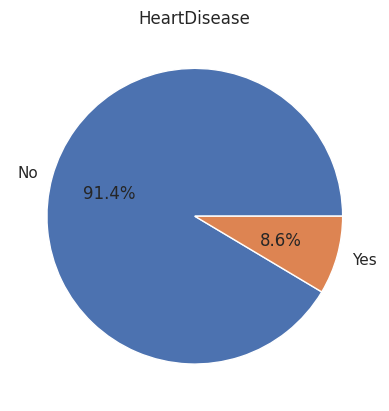

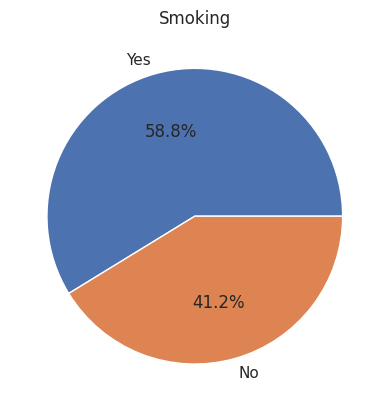

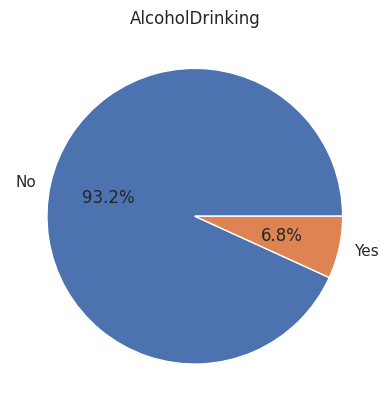

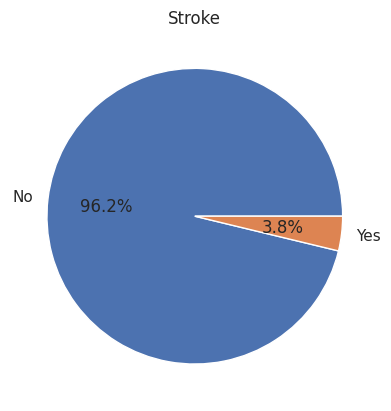

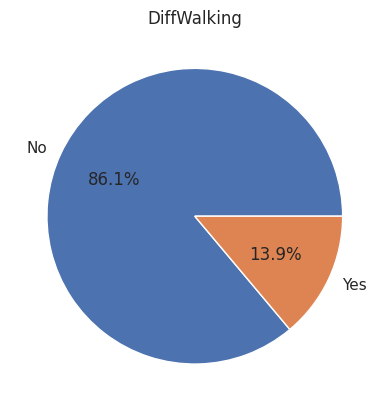

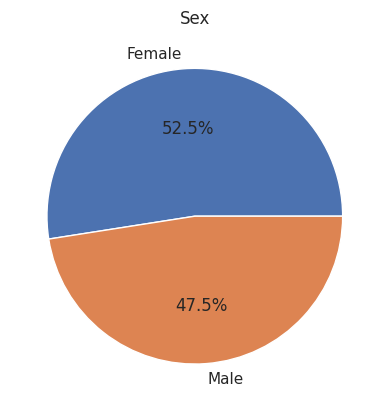

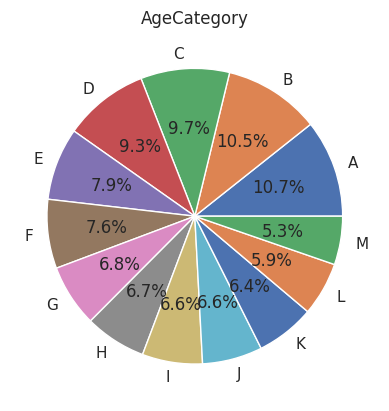

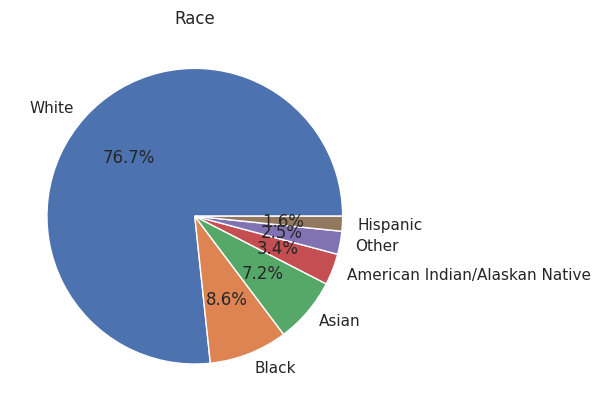

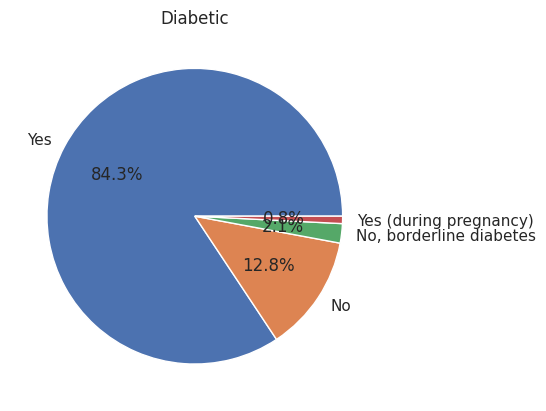

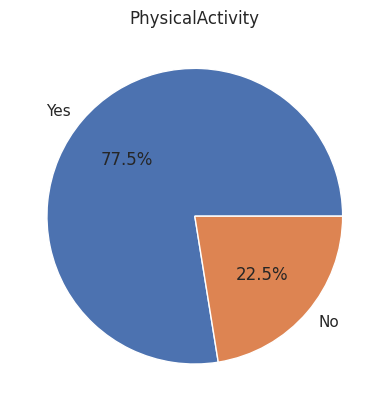

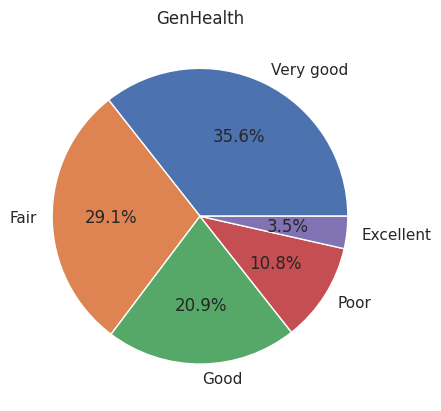

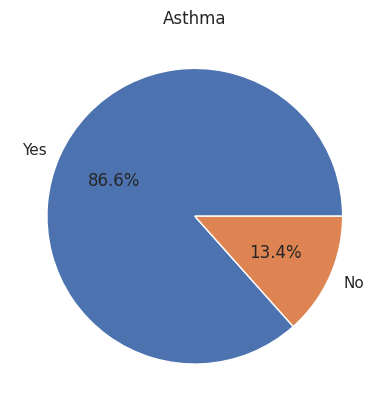

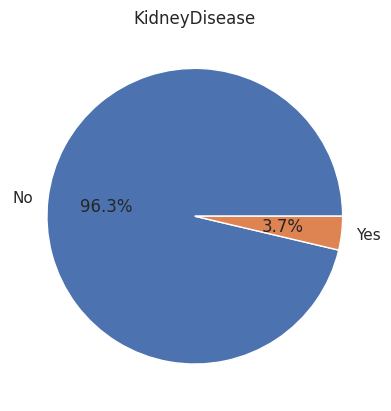

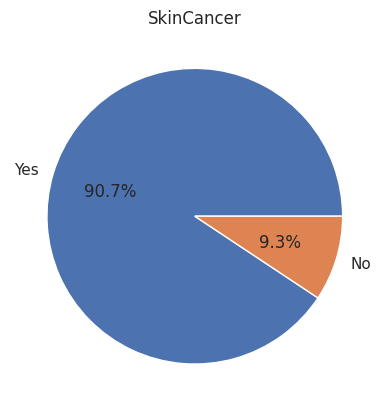

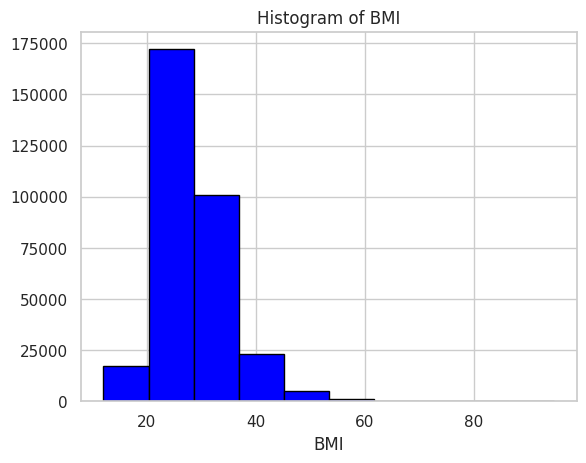

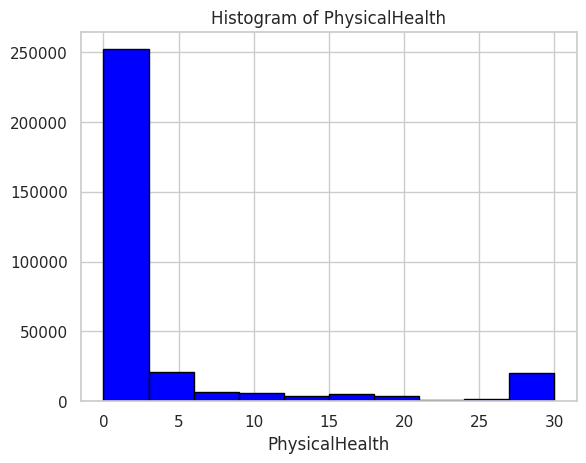

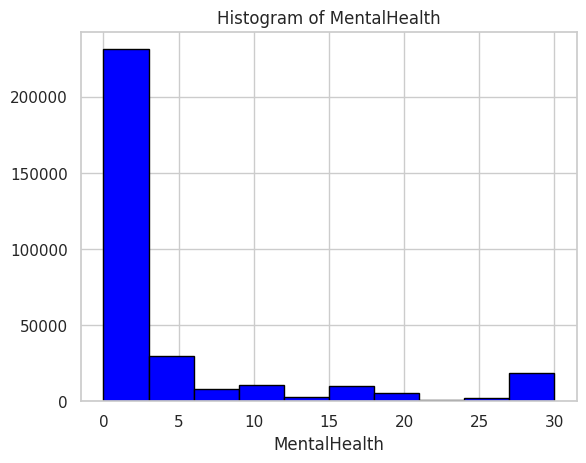

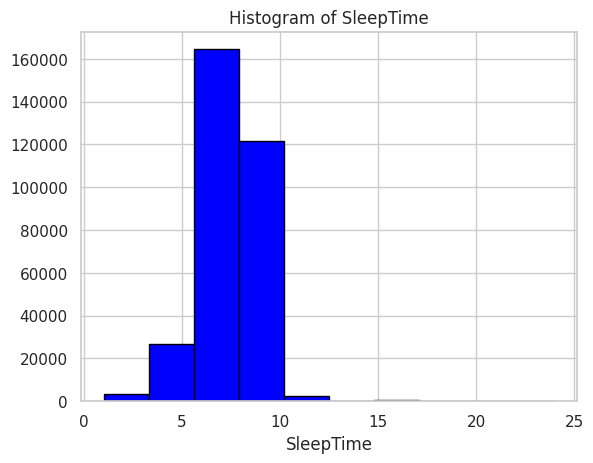

In [ ]:
numerical_data = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
categorical_data = df.drop(columns=numerical_data)

def plotPieChart(feature):
  plt.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%1.1f%%')
  plt.title(feature)
  plt.show()

def plotHistogramChart(feature):
  plt.hist(df[feature], color='blue', edgecolor='black')
  plt.title(f"Histogram of {feature}")
  plt.xlabel(feature)
  plt.show()

#used for age group since it has more than 8 categories
def plotBarChart(feature):
  sns.countplot(y=feature, data=df)
  plt.title(f'Bar Chart of {feature}')
  plt.show()

# categorical data plots
for i in categorical_data:
  if i == "Age"
  plotPieChart(i)

# numerical Data Plots
for i in numerical_data:
  plotHistogramChart(i)

# New Section

Some Resources:
https://www.simplypsychology.org/boxplots.html